In [25]:
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow

In [26]:
img = cv2.imread("template_images/1.jpg", cv2.IMREAD_GRAYSCALE)

In [27]:
ret, thresh = cv2.threshold(img, 159, 255, cv2.THRESH_BINARY)

In [28]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

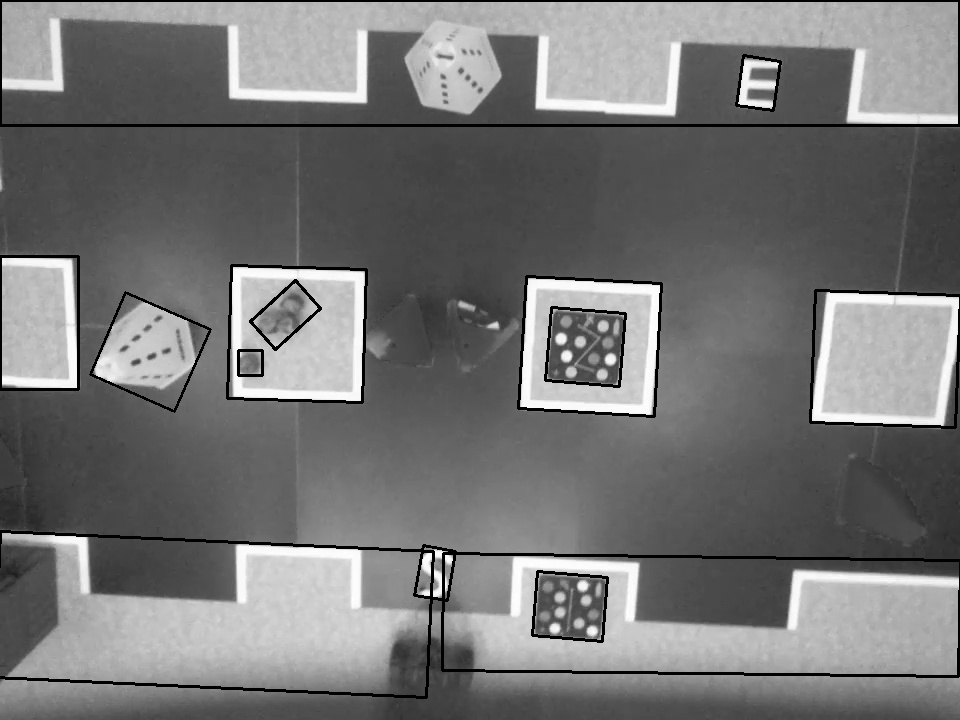

In [46]:
img2 = img.copy()
for contour in contours:
  rect = cv2.minAreaRect(contour)
  box = cv2.boxPoints(rect)
  if rect[1][0] < 15 or rect[1][1] < 15:
    continue
  cv2.drawContours(img2,[np.int0(box)],0,(0,0,0),2)
cv2_imshow(img2)

In [30]:
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0) 
    box = cv2.boxPoints(rect0)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

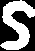

In [31]:
template_s = cv2.imread("template_images/S.jpg", cv2.IMREAD_GRAYSCALE)
ret, template_s = cv2.threshold(template_s, 159, 255, cv2.THRESH_BINARY)
cv2_imshow(template_s)

In [39]:
match_vals = []
match_rects = []
for contour in contours:
  rect = cv2.minAreaRect(contour)
  cropped_img = crop_minAreaRect(thresh, rect)
  if cropped_img.shape[0] < 14 or cropped_img.shape[1] < 14:
    continue
  cropped_img = imutils.resize(cropped_img, width=template_s.shape[1])
  res = cv2.matchTemplate(img, template_s, cv2.TM_CCOEFF_NORMED)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  match_vals.append(max_val)
  match_rects.append(rect)


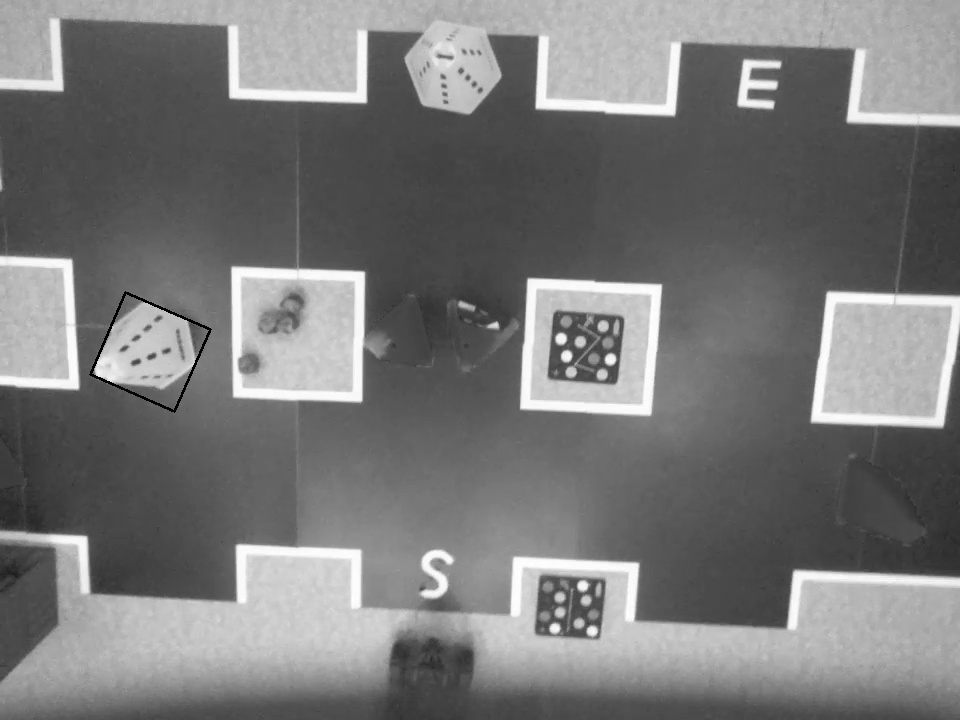

In [47]:
img3 = img.copy()
max_box = cv2.boxPoints(match_rects[match_vals.index(max(match_vals))])
cv2.drawContours(img3,[np.int0(max_box)],0,(0,0,0),2)
cv2_imshow(img3)